# Import Necessary Modules

In [1]:
from fastai.vision.all import *
import fastbook
from fastbook import *
from fastai.vision.widgets import *
import os 

# Use Key to Get Access to Bing Image Search API In Order to Gather Images

In [2]:

key = os.environ.get('AZURE_SEARCH_KEY','22ecba2201fa4438bb7662c331379fa7')


# Create Folder and Gather Images

In [3]:
actors = 'Mark Walhberg','Matt Damon'
path = Path('actors')

if not path.exists() : 
    path.mkdir()
    
    for a in actors : 
        
        dest = (path/a) 
        dest.mkdir(exist_ok = True)
        results = search_images_bing(key,a)
        download_images(dest,urls=results.attrgot('contentUrl'))
        
else : 
    for a in actors : 
        
        dest = (path/a) 
        dest.mkdir(exist_ok = True)
        results = search_images_bing(key,a)
        download_images(dest,urls=results.attrgot('contentUrl'))
        
        
        

### Check if there are any failed links that has no images

In [5]:
fns = get_image_files(path)
failed_images = verify_images(fns)
failed_images 

/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:2942: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:2942: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:2942: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


(#16) [Path('actors/Mark Walhberg/00000002.jpg'),Path('actors/Mark Walhberg/00000138.jpg'),Path('actors/Mark Walhberg/00000088.jpg'),Path('actors/Mark Walhberg/00000026.jpg'),Path('actors/Mark Walhberg/00000018.jpg'),Path('actors/Mark Walhberg/00000068.jpg'),Path('actors/Mark Walhberg/00000135.jpg'),Path('actors/Mark Walhberg/00000108.jpg'),Path('actors/Mark Walhberg/00000011.jpg'),Path('actors/Mark Walhberg/00000024.jpg')...]

### If so , delete them from the dataset

In [6]:
failed_images.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

# Use Fastai's DATABLOCK class to get data ready for training 

In [7]:
actors_i_get_confused_with = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files, 
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label, 
    item_tfms = Resize(128)
)

### Load the data and view a few of them 

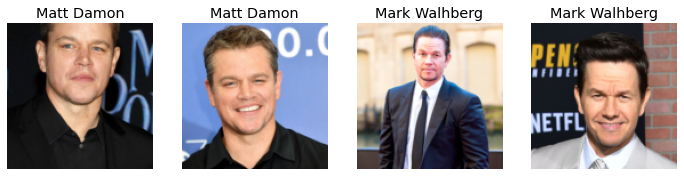

In [8]:
dls = actors_i_get_confused_with.dataloaders(path) 
dls.valid.show_batch(max_n = 4, nrows = 1)


# Use Data Augmentation 

In [9]:
actors_i_get_confused_with = actors_i_get_confused_with.new(item_tfms=RandomResizedCrop(224,min_scale = 0.5),
                                                           batch_tfms = aug_transforms())
dls = actors_i_get_confused_with.dataloaders(path)


# Training Using Transfer Learning Using Pre-trained ResNet 

In [10]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)

learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.405790,2.632674,0.520833,00:05


/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.788780,1.424746,0.479167,00:05
1,0.675483,0.871626,0.354167,00:05
2,0.630040,0.525258,0.270833,00:05
3,0.567445,0.352848,0.145833,00:05
4,0.488520,0.261008,0.104167,00:05
5,0.445183,0.209501,0.104167,00:05
6,0.395895,0.179200,0.083333,00:05
7,0.349445,0.145506,0.062500,00:05
8,0.316367,0.122545,0.062500,00:05
9,0.285759,0.096146,0.062500,00:05


/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/erfan/anaconda3/envs/fastai_journey/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed i

# Check Confusion Matrix to See how model is doing 

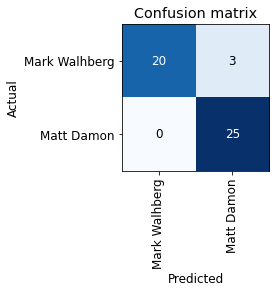

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Export Model To Deploy

In [12]:
learn.export() 
path = Path() 
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]